# A/B Testing For Optimizing Product Page for Higher Conversions

## Problem definition

The medium-sized online e-commerce business, VirtuMart Central, is currently experiencing a conversion rate of approximately 13% on its product page. The UX design team has developed a new version of the product page with the aim of increasing this conversion rate. The goal is to achieve an uplift of 2%, raising the conversion rate to 15%. The challenge is to determine whether the new design is effective in achieving this uplift. This will be tested through an A/B test, named the “Product Page Conversion Test”, where the performance of the new design (variant B) will be compared against the current design (variant A) in terms of conversion rate. The success of the new design will be measured by its ability to achieve or exceed the target conversion rate of 15%.

Note: VirtuMart Central is a fictional company.

 **Conversion rate:**
 In the context of e-commerce, the conversion rate is the percentage of visitors to your e-commerce website or landing page that complete a desired action. This action could be anything from making a purchase, signing up for a newsletter, downloading a file, or any other goal of the webpage. In our scenario, the current conversion rate of the product page is 13%, meaning that out of every 100 visitors to the product page, 13 are making a purchase. The goal is to increase this to 15% with the new design.


## 1. Designing our experiment

### Formulating a hypothesis


At the commencement of our project, it's crucial to formulate a hypothesis. This ensures that our interpretation of the results is both accurate and rigorous.

Considering the uncertainty of whether the new design will outperform, underperform, or perform similarly to our current design, we opt for a two-tailed test. In this context, `p0` and `p1` represent the conversion rates of the new and old designs, respectively.

We establish a confidence level of 95%, denoted as:

```
Confidence Level = 95%
```

The `α` value is a predefined threshold. If the probability of observing a result as extreme or more (p-value) is less than `α`, we reject the null hypothesis. Given our `α` is 0.05 (indicating a 5% probability), our confidence (1 - `α`) is 95%.


### Variable Selection

For our experiment, we require two groups:

1. **Control Group**: This group will be presented with the old design.
2. **Experimental Group (or Treatment Group)**: This group will be exposed to the new design.

These groups represent our **Independent Variable**. The rationale for having two groups, despite knowing the baseline conversion rate, is to control for potential confounding variables, such as seasonality. By having a control group, we can directly compare their results with the experimental group. Since the only systematic difference between the groups is the design of the product page, we can attribute any differences in results to the designs.

Our **Dependent Variable** (the metric we aim to measure) is the conversion rate. We can represent this for each user session with a binary variable:

- `0` - The user did not purchase the product during this session.
- `1` - The user purchased the product during this session.

By doing this, we can easily calculate the mean for each group to determine the conversion rate of each design.

### Determining Sample Size

It's crucial to understand that we won't be testing our entire user base (our population). Therefore, the conversion rates we obtain will only be estimates of the actual rates.

The number of individuals (or user sessions) we include in each group will impact the precision of our estimated conversion rates. A larger sample size leads to more precise estimates (i.e., smaller confidence intervals) and a higher probability of detecting a difference between the two groups, if one exists.

However, as our sample size increases, our study becomes more costly and impractical.

So, how many individuals should we include in each group?

The required sample size is determined through a process known as Power Analysis, which depends on several factors:

- **Test Power (β)**: This represents the probability of detecting a statistical difference between the groups in our test when a difference actually exists. Conventionally, this is set at 0.8.
- **Alpha Value (α)**: This is the critical value we previously set to 0.05.
- **Effect Size**: This is the expected difference between the conversion rates.

Assuming our team would be satisfied with a difference of 2%, we can use 13% and 15% to calculate the expected effect size.

Fortunately, Python can handle all these calculations for us:

In [20]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import scipy.stats as stats  # For statistical functions
import statsmodels.stats.api as sms  # For statistical models
import matplotlib as mpl  # For creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For data visualization based on matplotlib
from math import ceil  # For rounding up

# This line allows the visuals to render within your Jupyter Notebook
%matplotlib inline

# Setting some styling preferences for our plot
sns.set_style("whitegrid")  # Using seaborn's whitegrid style for plots
font = {'family' : 'Arial',  # The font family
        'weight' : 'bold',  # The font weight
        'size'   : 14}  # The font size

mpl.rc('font', **font)  # Applying the font settings


In [3]:
effect_size = sms.proportion_effectsize(0.13, 0.15)    # Calculating effect size based on our expected rates

required_n = sms.NormalIndPower().solve_power(
    effect_size,
    power=0.8,
    alpha=0.05,
    ratio=1
    )                                                  # Calculating sample size needed

required_n = ceil(required_n)                          # Rounding up to next whole number

print(required_n)

4720


We'd need at least 4720 observations for each group.

Setting the power parameter to 0.8 essentially implies that if there is a real difference in the conversion rate between our designs, and we assume this difference to be as we estimated (13% vs. 15%), then there is approximately an 80% probability that we will identify it as statistically significant in our test with the calculated sample size.

## 2. Collecting and preparing the data

Now that we've determined the necessary sample size, the next step is to gather the data. Typically, at this juncture, you would collaborate with your team to initiate the experiment, likely with the assistance of the Engineering team, ensuring that you amass sufficient data in accordance with the required sample size.

In [4]:
# Importing the data from a CSV file located in the specified path
df = pd.read_csv('/content/drive/MyDrive/a_btest_data.csv')

# Displaying the first 5 rows of the dataframe to check if the data has been loaded correctly
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
# The info() function is used to print a concise summary of a DataFrame.
# This includes the index dtype and column dtypes, non-null values and memory usage.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


The DataFrame consists of 294478 rows, with each row representing a user session. It contains the following 5 columns:

- **user_id**: The unique identifier for each session.
- **timestamp**: The specific time at which the session occurred.
- **group**: The group to which the user was assigned for that session. The groups are 'control' and 'treatment'.
- **landing_page**: The design that each user encountered during the session. The designs are 'old_page' and 'new_page'.
- **converted**: This indicates whether the session resulted in a conversion or not. It's a binary variable where 0 signifies 'not converted' and 1 signifies 'converted'.

For the purpose of our analysis, we'll primarily focus on the 'group' and 'converted' columns.

In [6]:
# We want to ensure that all users in the control group are seeing the old page and vice versa.
# So, we create a cross-tabulation (or contingency table) of 'group' and 'landing_page' columns.
# This table provides us a summary of the frequency distribution of these categories.

pd.crosstab(df['group'], df['landing_page'])


landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


The result we're seeing is a cross-tabulation between the 'group' and 'landing_page' columns of our dataset. Here's how to interpret it:

- The 'control' group row shows that 1928 users in the control group incorrectly saw the new page, while 145274 users correctly saw the old page.
- The 'treatment' group row shows that 145311 users in the treatment group correctly saw the new page, while 1965 users incorrectly saw the old page.

Ideally, in a properly conducted A/B test, all users in the control group should see the old page and all users in the treatment group should see the new page. The presence of users seeing the incorrect page in both groups could potentially skew the results of the test. we might need to address this issue before proceeding with the analysis.

 Address the issue of users seeing the incorrect page

In [7]:
# Filter out the rows where users in the control group saw the new page
df = df[~((df['group'] == 'control') & (df['landing_page'] == 'new_page'))]

# Filter out the rows where users in the treatment group saw the old page
df = df[~((df['group'] == 'treatment') & (df['landing_page'] == 'old_page'))]


In [10]:
# verify that the data filtration has been done correctly.
pd.crosstab(df['group'], df['landing_page'])


landing_page,new_page,old_page
group,,
control,0,145274
treatment,145311,0


Before we go ahead and sample the data to get our subset, let's make sure there are no users that have been sampled multiple times.



In [11]:
# Count the number of sessions each user has in the DataFrame.
# The 'value_counts' function also sorts the values in descending order by default.
session_counts = df['user_id'].value_counts(ascending=False)

# Identify users that appear more than once in the dataset.
# These are the users who have session counts greater than 1.
multi_users = session_counts[session_counts > 1].count()

# Print the number of users that appear multiple times in the dataset.
print(f'There are {multi_users} users that appear multiple times in the dataset')


There are 1 users that appear multiple times in the dataset


There are, in fact, users that appear more than once. Since the number is very low, we'll go ahead and remove them from the DataFrame to avoid sampling the same users twice.

In [12]:
# Identify the users who appear more than once in the dataset.
# These are the users who have session counts greater than 1.
users_to_drop = session_counts[session_counts > 1].index

# Remove the users that appear more than once from the DataFrame.
df = df[~df['user_id'].isin(users_to_drop)]

# Print the number of entries in the updated DataFrame.
print(f'The updated dataset now has {df.shape[0]} entries')


The updated dataset now has 290583 entries


## 3. Sampling
Now that our DataFrame is nice and clean, we can proceed and sample n=4720 entries for each of the groups.

In [13]:
# Create a sample from the control group. The size of the sample is 'required_n'.
# The 'random_state' parameter is set for reproducibility. This ensures that the random samples generated are the same each time this code is run.
control_sample = df[df['group'] == 'control'].sample(n=required_n, random_state=22)

# Create a sample from the treatment group, similar to the control group sample.
treatment_sample = df[df['group'] == 'treatment'].sample(n=required_n, random_state=22)

# Combine the control and treatment samples into one DataFrame for the A/B test.
# The 'axis=0' argument in the 'concat' function indicates that the DataFrames should be concatenated vertically (i.e., one on top of the other).
ab_test = pd.concat([control_sample, treatment_sample], axis=0)

# Reset the index of the DataFrame. The 'drop=True' argument indicates that the old index should be discarded.
ab_test.reset_index(drop=True, inplace=True)


In [17]:
#  verify that the sampling has been done correctly.
ab_test['group'].value_counts()


control      4720
treatment    4720
Name: group, dtype: int64

The initial step we can take is to compute some fundamental statistics to gain insights into the characteristics of our samples.



In [18]:
# Group the data by 'group' column and select the 'converted' column
conversion_rates = ab_test.groupby('group')['converted']

# Define a lambda function to calculate the standard deviation of the proportion
std_p = lambda x: np.std(x, ddof=0)

# Define a lambda function to calculate the standard error of the proportion (standard deviation / sqrt(n))
se_p = lambda x: stats.sem(x, ddof=0)

# Apply the aggregation functions (mean, standard deviation, standard error) to the grouped data
conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])

# Rename the columns for better understanding
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']

# Display the DataFrame with formatting applied to three decimal places
conversion_rates.style.format('{:.3f}')


,conversion_rate,std_deviation,std_error
group,,,
control,0.120,0.325,0.005
treatment,0.121,0.327,0.005


Based on the statistics provided, it appears that the two designs had very similar performance, with the new design showing a slight improvement. The conversion rate was approximately 12.3% for the old design and 12.6% for the new design.

Visualizing these results can make them easier to understand, so let's proceed with creating a plot:

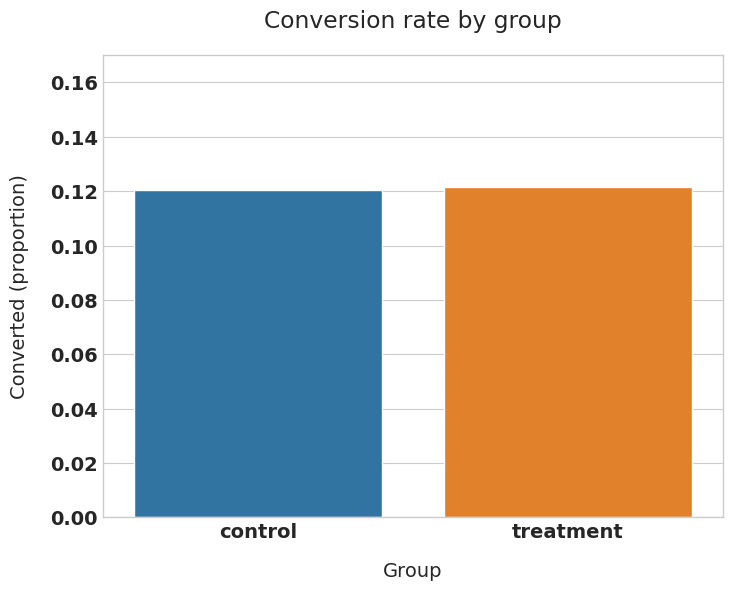

In [25]:
# Set the size of the figure
plt.figure(figsize=(8,6))

# Create a bar plot of the 'converted' column for each group. 'ci=False' removes the confidence interval.
sns.barplot(x=ab_test['group'], y=ab_test['converted'],errorbar=('ci', False))

# Set the limits of the y-axis
plt.ylim(0, 0.17)

# Set the title of the plot, with some additional padding for better aesthetics
plt.title('Conversion rate by group', pad=20)

# Set the label of the x-axis, with some additional padding for better aesthetics
plt.xlabel('Group', labelpad=15)

# Set the label of the y-axis, with some additional padding for better aesthetics
plt.ylabel('Converted (proportion)', labelpad=15);


The conversion rates for our groups are indeed very close. Also note that the conversion rate of the control group is lower than what we would have expected given what we knew about our avg. conversion rate (12.3% vs. 13%). This goes to show that there is some variation in results when sampling from a population.

As for the treatment group, while its value is higher, the key question remains: Is this difference statistically significant?

## 4. Testing the hypothesis

The final stage of our analysis involves testing our hypothesis. Given the large size of our sample, we can utilize the normal approximation for calculating our p-value, which is a method known as the z-test.

Python simplifies all these calculations for us. We can employ the `statsmodels.stats.proportion` module to obtain the p-value and confidence intervals.

In [26]:
# Importing the necessary functions for the test
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Getting the results of the control group from the ab_test dataframe
control_results = ab_test[ab_test['group'] == 'control']['converted']

# Getting the results of the treatment group from the ab_test dataframe
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']

In [29]:
# Counting the number of observations in control group
n_con = control_results.count()

# Counting the number of observations in treatment group
n_treat = treatment_results.count()

# Summing up the successes (conversions) in both groups
successes = [control_results.sum(), treatment_results.sum()]

# Creating a list of the number of observations in both groups
nobs = [n_con, n_treat]

# Performing the z-test
z_stat, pval = proportions_ztest(successes, nobs=nobs)

# Calculating the confidence interval for both groups
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

# Printing the z statistic
print(f'z statistic: {z_stat:.2f}')

# Printing the p-value
print(f'p-value: {pval:.3f}')

# Printing the confidence interval for the control group
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')

# Printing the confidence interval for the treatment group
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')


z statistic: -0.16
p-value: 0.875
ci 95% for control group: [0.111, 0.130]
ci 95% for treatment group: [0.112, 0.131]


## 5. Drawing conclusions

Given that our p-value of 0.732 significantly exceeds our α-level of 0.05, we are unable to reject the null hypothesis. This implies that there is no significant difference in performance between our new and old designs, much less any improvement.

Moreover, when we examine the confidence interval for the treatment group, which ranges from 11.6% to 13.5% (i.e., [0.116, 0.135]), we observe two key points:

1. Our baseline conversion rate of 13% is included within this interval.
2. Our target value of 15%, which represents the 2% uplift we were aiming for, is not included within this interval.

These observations suggest that the true conversion rate of the new design is likely closer to our baseline rather than the 15% target we had set. This further indicates that our new design probably doesn't improve upon our old one. Unfortunately, it seems we might have to go back to the drawing board.